In [1]:
include("../funcs/adjacency.jl")  
include("../funcs/mps.jl")  
include("../funcs/hamiltonian.jl")

solve_xxz_hamiltonian_dmrg (generic function with 4 methods)

In [2]:
num_sweeps = [10, 20, 30, 40, 50]
max_bond_dim = 1000

# Hamiltonian parameters - Heisenberg XXZ
J = -1 # interaction strength
Δ = -1 # anisotropy parameter

N_vals = 10:1:75

10:1:75

In [9]:
using ProgressMeter

data = Dict()


for i in 1:length(num_sweeps)
    sweep = num_sweeps[i]
    total_iters = length(N_vals)
    p = Progress(total_iters, desc="Calculating bond dimensions for sweep $sweep...")
    data[sweep] = Dict()
    for N in shuffle(N_vals)
        wam = generate_fully_connected_wam(N, 0.0)
        ψ_mps, sites = create_MPS(N)
        H = create_xxz_hamiltonian_mpo(N, wam, J, Δ, sites)
        energy, ψ_gs = solve_xxz_hamiltonian_dmrg(H, ψ_mps, sweep, max_bond_dim, 1e-10)
        data[sweep][N] = maxlinkdim(ψ_gs)
        next!(p)
    end
end

Calculating bond dimensions for sweep 10... 100%|████████| Time: 0:02:52
Calculating bond dimensions for sweep 20... 100%|████████| Time: 0:05:16
Calculating bond dimensions for sweep 30... 100%|████████| Time: 0:07:56
Calculating bond dimensions for sweep 40... 100%|████████| Time: 0:10:25
Calculating bond dimensions for sweep 50... 100%|████████| Time: 0:12:58


In [ ]:
using JLD2

jldsave("../data/bond_dim_vs_nodes_sweep_effect.jld2"; data)

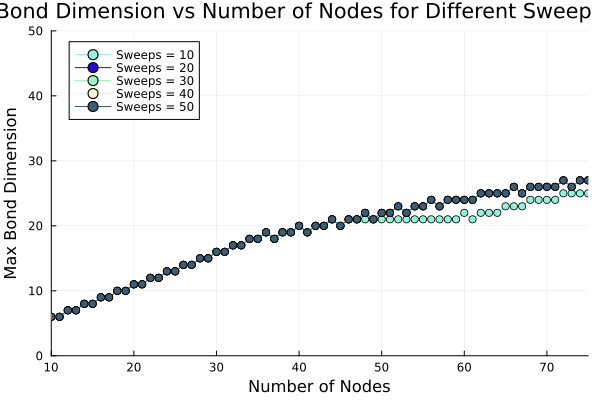

In [15]:
# plot

using Plots

plt = plot(title="Max Bond Dimension vs Number of Nodes for Different Sweep Numbers",
           xlabel="Number of Nodes",
           ylabel="Max Bond Dimension",
           xlims=(minimum(N_vals), maximum(N_vals)),
           ylims=(0, 50),
           legend=:topleft)

for sweep in num_sweeps
    N_plot = sort(collect(keys(data[sweep])))
    bond_dim_plot = [data[sweep][N] for N in N_plot]
    plot!(plt, N_plot,
           bond_dim_plot,
           label="Sweeps = $sweep",
           marker=:circle,
           color=RGB(rand(), rand(), rand()))
end

display(plt)